In [1]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt

# Find distance of resale flats to nearest MRT stations and Hawker Centres

In [2]:
resale = pd.read_csv('resale_coordinates.csv')
mrt = pd.read_csv('mrt_coordinates.csv')
hawker = pd.read_csv('hawker_coordinates.csv')
df = pd.read_csv('resale.csv')

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
resale_coordinates = list(zip(resale['latitude'], resale['longitude']))
mrt_coordinates = list(zip(mrt['latitude'], mrt['longitude']))
hawker_coordinates = list(zip(hawker['latitude'], hawker['longitude']))

In [4]:
from geopy.distance import geodesic

dist_mrt = []
min_dist_mrt = []

for origin in resale_coordinates:
    for destination in range(0, len(mrt_coordinates)):
        dist_mrt.append(geodesic(origin,mrt_coordinates[destination]).meters)
    shortest = (min(dist_mrt))
    min_dist_mrt.append(shortest)
    dist_mrt.clear()

In [5]:
dist_hawker = []
min_dist_hawker = []

for origin in resale_coordinates:
    for destination in range(0, len(hawker_coordinates)):
        dist_hawker.append(geodesic(origin,hawker_coordinates[destination]).meters)
    shortest = (min(dist_hawker))
    min_dist_hawker.append(shortest)
    dist_hawker.clear()

In [6]:
resale['min_dist_mrt'] = min_dist_mrt
resale['min_dist_hawker'] = min_dist_hawker
resale

,latitude,longitude,blk_no,road_name,postal_code,address,min_dist_mrt,min_dist_hawker
0,1.374694,103.836463,172,ANG MO KIO AVENUE 4,560172,172 ANG MO KIO AVE 4,357.463105,302.505715
1,1.373346,103.836459,116,ANG MO KIO AVENUE 4,560116,116 ANG MO KIO AVE 4,208.579730,329.351137
2,1.366197,103.841505,216,ANG MO KIO AVENUE 1,560216,216 ANG MO KIO AVE 1,800.632183,185.121528
3,1.365445,103.842715,208,ANG MO KIO AVENUE 1,560208,208 ANG MO KIO AVE 1,908.966029,343.146965
4,1.365588,103.840519,220,ANG MO KIO AVENUE 1,560220,220 ANG MO KIO AVE 1,784.436819,180.393019
...,...,...,...,...,...,...,...,...
9318,1.315842,103.860645,10C,BENDEMEER ROAD,333010,10C BENDEMEER RD,353.530483,457.337938
9319,1.446141,103.832236,120A,CANBERRA CRESCENT,751120,120A CANBERRA CRES,440.785780,1676.006793
9320,1.418753,103.841389,672A,YISHUN AVENUE 4,761672,672A YISHUN AVE 4,947.939741,2003.942631
9321,1.414303,103.840417,509C,YISHUN AVENUE 4,763509,509C YISHUN AVE 4,894.968747,2311.161204


In [7]:
df = df.drop('remaining_lease', axis=1)
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,mth,estimated_storey,remaining_lease_adjusted,adjust_inflation,resale_price_adjusted
0,2011-01,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,01 TO 03,45.0,Improved,1986,230000.0,2011,1,2,74,0.99,227700.0
1,2011-01,ANG MO KIO,2 ROOM,116,ANG MO KIO AVE 4,01 TO 03,44.0,Improved,1978,220000.0,2011,1,2,66,0.99,217800.0
2,2011-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,328000.0,2011,1,8,64,0.99,324720.0
3,2011-01,ANG MO KIO,3 ROOM,208,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,333000.0,2011,1,8,64,0.99,329670.0
4,2011-01,ANG MO KIO,3 ROOM,220,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1977,308000.0,2011,1,8,65,0.99,304920.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231502,2021-12,YISHUN,EXECUTIVE,606,YISHUN ST 61,10 TO 12,146.0,Maisonette,1987,690000.0,2021,12,11,65,1.00,690000.0
231503,2021-12,YISHUN,EXECUTIVE,643,YISHUN ST 61,10 TO 12,142.0,Apartment,1987,655000.0,2021,12,11,65,1.00,655000.0
231504,2021-12,YISHUN,EXECUTIVE,877,YISHUN ST 81,01 TO 03,142.0,Apartment,1987,738000.0,2021,12,2,65,1.00,738000.0
231505,2021-12,YISHUN,EXECUTIVE,824,YISHUN ST 81,04 TO 06,146.0,Maisonette,1987,755000.0,2021,12,5,65,1.00,755000.0


In [8]:
df['price_per_sqm'] = df['resale_price_adjusted'] / df['floor_area_sqm']
df['address'] = df['block'] + " " + df['street_name']
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,mth,estimated_storey,remaining_lease_adjusted,adjust_inflation,resale_price_adjusted,price_per_sqm,address
0,2011-01,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,01 TO 03,45.0,Improved,1986,230000.0,2011,1,2,74,0.99,227700.0,5060.000000,172 ANG MO KIO AVE 4
1,2011-01,ANG MO KIO,2 ROOM,116,ANG MO KIO AVE 4,01 TO 03,44.0,Improved,1978,220000.0,2011,1,2,66,0.99,217800.0,4950.000000,116 ANG MO KIO AVE 4
2,2011-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,328000.0,2011,1,8,64,0.99,324720.0,4448.219178,216 ANG MO KIO AVE 1
3,2011-01,ANG MO KIO,3 ROOM,208,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,333000.0,2011,1,8,64,0.99,329670.0,4516.027397,208 ANG MO KIO AVE 1
4,2011-01,ANG MO KIO,3 ROOM,220,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1977,308000.0,2011,1,8,65,0.99,304920.0,4551.044776,220 ANG MO KIO AVE 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231502,2021-12,YISHUN,EXECUTIVE,606,YISHUN ST 61,10 TO 12,146.0,Maisonette,1987,690000.0,2021,12,11,65,1.00,690000.0,4726.027397,606 YISHUN ST 61
231503,2021-12,YISHUN,EXECUTIVE,643,YISHUN ST 61,10 TO 12,142.0,Apartment,1987,655000.0,2021,12,11,65,1.00,655000.0,4612.676056,643 YISHUN ST 61
231504,2021-12,YISHUN,EXECUTIVE,877,YISHUN ST 81,01 TO 03,142.0,Apartment,1987,738000.0,2021,12,2,65,1.00,738000.0,5197.183099,877 YISHUN ST 81
231505,2021-12,YISHUN,EXECUTIVE,824,YISHUN ST 81,04 TO 06,146.0,Maisonette,1987,755000.0,2021,12,5,65,1.00,755000.0,5171.232877,824 YISHUN ST 81


In [9]:
df_price = df[['address', 'price_per_sqm']].groupby('address').agg({'price_per_sqm': 'median'}).reset_index()
df_price

,address,price_per_sqm
0,1 BEACH RD,5029.411765
1,1 BEDOK STH AVE 1,4827.118644
2,1 CHAI CHEE RD,3976.136364
3,1 CHANGI VILLAGE RD,4166.666667
4,1 DELTA AVE,6212.184874
...,...,...
9330,99A LOR 2 TOA PAYOH,5724.137931
9331,99B LOR 2 TOA PAYOH,5475.586207
9332,99C LOR 2 TOA PAYOH,5442.229730
9333,9A BOON TIONG RD,10262.321429


In [10]:
combined = pd.merge(resale, df_price, on = 'address')
combined

,latitude,longitude,blk_no,road_name,postal_code,address,min_dist_mrt,min_dist_hawker,price_per_sqm
0,1.374694,103.836463,172,ANG MO KIO AVENUE 4,560172,172 ANG MO KIO AVE 4,357.463105,302.505715,4477.333333
1,1.373346,103.836459,116,ANG MO KIO AVENUE 4,560116,116 ANG MO KIO AVE 4,208.579730,329.351137,5056.818182
2,1.366197,103.841505,216,ANG MO KIO AVENUE 1,560216,216 ANG MO KIO AVE 1,800.632183,185.121528,4419.520548
3,1.365445,103.842715,208,ANG MO KIO AVENUE 1,560208,208 ANG MO KIO AVE 1,908.966029,343.146965,4382.003288
4,1.365588,103.840519,220,ANG MO KIO AVENUE 1,560220,220 ANG MO KIO AVE 1,784.436819,180.393019,4328.358209
...,...,...,...,...,...,...,...,...,...
9318,1.315842,103.860645,10C,BENDEMEER ROAD,333010,10C BENDEMEER RD,353.530483,457.337938,9301.075269
9319,1.446141,103.832236,120A,CANBERRA CRESCENT,751120,120A CANBERRA CRES,440.785780,1676.006793,5913.978495
9320,1.418753,103.841389,672A,YISHUN AVENUE 4,761672,672A YISHUN AVE 4,947.939741,2003.942631,7236.842105
9321,1.414303,103.840417,509C,YISHUN AVENUE 4,763509,509C YISHUN AVE 4,894.968747,2311.161204,5376.344086


In [11]:
combined.corr()

,latitude,longitude,min_dist_mrt,min_dist_hawker,price_per_sqm
latitude,1.000000,-0.030119,0.123331,0.514962,-0.496929
longitude,-0.030119,1.000000,0.143651,0.002704,0.171476
min_dist_mrt,0.123331,0.143651,1.000000,0.311775,-0.157941
min_dist_hawker,0.514962,0.002704,0.311775,1.000000,-0.289230
price_per_sqm,-0.496929,0.171476,-0.157941,-0.289230,1.000000


# How price of resale flats vary with distance to MRT stations

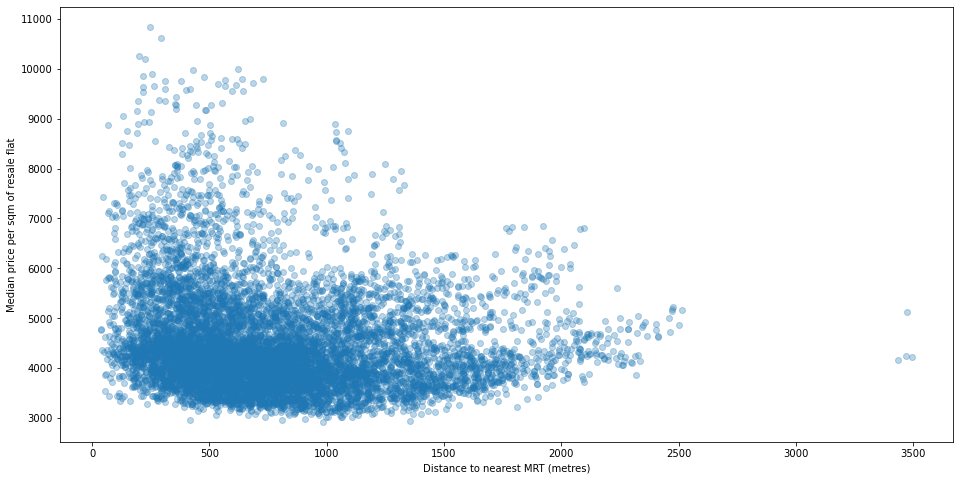

In [12]:
plt.figure(figsize=(16,8))
plt.scatter(combined['min_dist_mrt'], combined['price_per_sqm'], alpha=0.3)
plt.xlabel('Distance to nearest MRT (metres)')
plt.ylabel('Median price per sqm of resale flat')
plt.show()

# How price of resale flats vary with distance to hawker centres

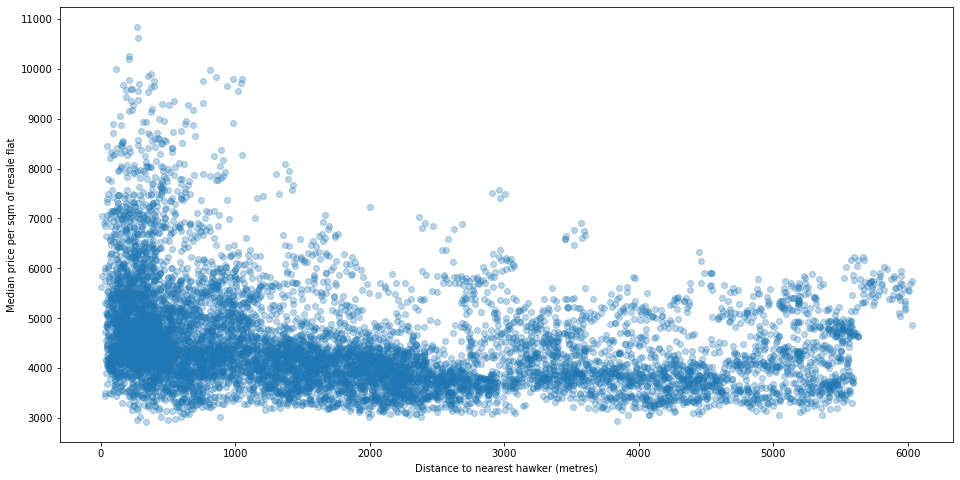

In [13]:
plt.figure(figsize=(16,8))
plt.scatter(combined['min_dist_hawker'], combined['price_per_sqm'], alpha = 0.3)
plt.xlabel('Distance to nearest hawker (metres)')
plt.ylabel('Median price per sqm of resale flat')
plt.show()

### The correlation coefficients for the relationship between prices and distance to nearest MRT and distance to nearest hawker centre are -0.158 and -0.289 respectively. Looking at the scatter plots, we can tell while there are some flats near MRT and hawker centre with very high price per sqm, it seems like the relationship is not very strong. 

### Let's zoom into a few towns to see how price of resale flats vary with distance to MRT stations and hawker centres.

### Jurong West

In [14]:
jurong_west = df[df['town'] == 'JURONG WEST']

In [15]:
df_price = jurong_west[['address', 'price_per_sqm']].groupby('address').agg({'price_per_sqm': 'median'}).reset_index()
combined = pd.merge(resale, df_price, on = 'address')
combined

,latitude,longitude,blk_no,road_name,postal_code,address,min_dist_mrt,min_dist_hawker,price_per_sqm
0,1.345727,103.711027,186,BOON LAY AVENUE,640186,186 BOON LAY AVE,961.991896,228.881249,4027.118644
1,1.346586,103.713568,207,BOON LAY PLACE,640207,207 BOON LAY PL,860.752863,106.007045,3883.846154
2,1.346258,103.715155,209,BOON LAY PLACE,640209,209 BOON LAY PL,681.676339,236.943422,3902.307692
3,1.347646,103.712933,210,BOON LAY PLACE,640210,210 BOON LAY PL,967.500676,209.124949,3978.762994
4,1.348241,103.714098,211,BOON LAY PLACE,640211,211 BOON LAY PL,880.473302,296.590792,3928.846154
...,...,...,...,...,...,...,...,...,...
691,1.340679,103.708445,697B,JURONG WEST CENTRAL 3,642697,697B JURONG WEST CTRL 3,350.517930,762.994022,6666.666667
692,1.341092,103.708024,698A,JURONG WEST CENTRAL 3,641698,698A JURONG WEST CTRL 3,350.985890,763.985490,6161.764706
693,1.340472,103.708355,697C,JURONG WEST CENTRAL 3,643697,697C JURONG WEST CTRL 3,328.075886,786.720039,7156.626506
694,1.350697,103.711459,218C,BOON LAY AVENUE,643218,218C BOON LAY AVE,1273.611354,574.954108,5691.489362


In [16]:
combined.corr()

,latitude,longitude,min_dist_mrt,min_dist_hawker,price_per_sqm
latitude,1.000000,0.166233,0.243636,-0.218762,-0.333893
longitude,0.166233,1.000000,0.096707,-0.905307,0.202641
min_dist_mrt,0.243636,0.096707,1.000000,-0.046825,-0.387747
min_dist_hawker,-0.218762,-0.905307,-0.046825,1.000000,-0.277166
price_per_sqm,-0.333893,0.202641,-0.387747,-0.277166,1.000000


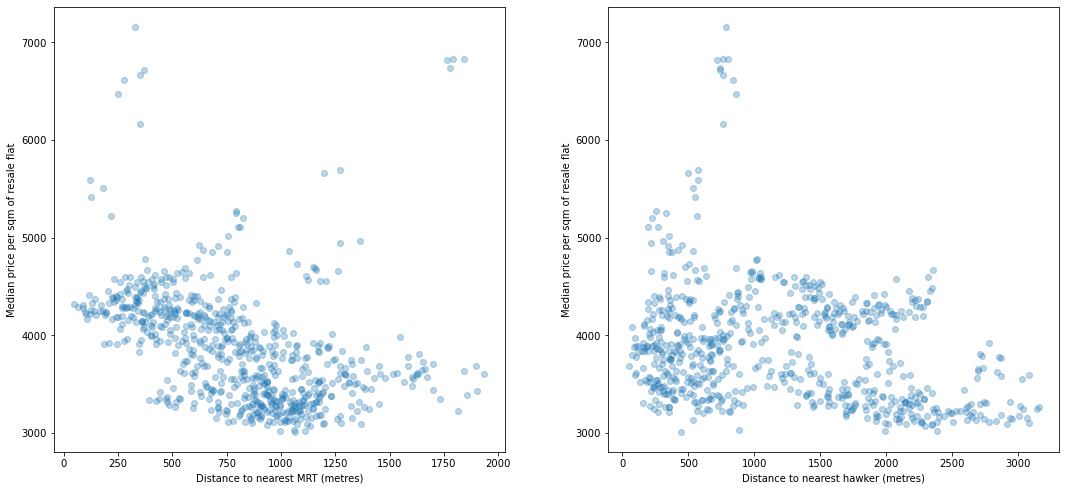

In [19]:
fig, axes = plt.subplots(1,2, figsize=(16,8))

axes[0].scatter(combined['min_dist_mrt'], combined['price_per_sqm'], alpha=0.3)
axes[0].set_xlabel('Distance to nearest MRT (metres)')
axes[0].set_ylabel('Median price per sqm of resale flat')

axes[1].scatter(combined['min_dist_hawker'], combined['price_per_sqm'], alpha = 0.3)
axes[1].set_xlabel('Distance to nearest hawker (metres)')
axes[1].set_ylabel('Median price per sqm of resale flat')

plt.tight_layout(pad=5.0)
plt.show()

### Pasir Ris

In [20]:
pasir_ris = df[df['town'] == 'PASIR RIS']

In [21]:
df_price = pasir_ris[['address', 'price_per_sqm']].groupby('address').agg({'price_per_sqm': 'median'}).reset_index()
combined = pd.merge(resale, df_price, on = 'address')
combined

,latitude,longitude,blk_no,road_name,postal_code,address,min_dist_mrt,min_dist_hawker,price_per_sqm
0,1.388547,103.987805,1,CHANGI VILLAGE ROAD,500001,1 CHANGI VILLAGE RD,3435.307099,127.025416,4166.666667
1,1.375785,103.940430,640,PASIR RIS DRIVE 1,510640,640 PASIR RIS DR 1,1030.945290,3395.030410,3787.500000
2,1.376668,103.939881,639,PASIR RIS DRIVE 1,510639,639 PASIR RIS DR 1,1120.652933,3500.480239,3709.200820
3,1.380232,103.937566,702,PASIR RIS DRIVE 10,510702,702 PASIR RIS DR 10,1527.241294,3933.811177,3859.642857
4,1.378009,103.940687,633,PASIR RIS DRIVE 3,510633,633 PASIR RIS DR 3,1103.216520,3635.298412,3900.673077
...,...,...,...,...,...,...,...,...,...
424,1.369686,103.947922,527D,PASIR RIS STREET 51,514527,527D PASIR RIS ST 51,400.964590,2713.246675,5755.514706
425,1.371626,103.950114,530C,PASIR RIS DRIVE 1,513530,530C PASIR RIS DR 1,181.860547,2966.362696,7401.610018
426,1.371690,103.949502,530B,PASIR RIS DRIVE 1,512530,530B PASIR RIS DR 1,151.639502,2959.992508,7567.084079
427,1.371141,103.949851,530A,PASIR RIS DRIVE 1,511530,530A PASIR RIS DR 1,219.626499,2907.835563,7504.761905


In [22]:
combined.corr()

,latitude,longitude,min_dist_mrt,min_dist_hawker,price_per_sqm
latitude,1.000000,-0.623772,0.325880,0.590184,0.069164
longitude,-0.623772,1.000000,0.049035,-0.598817,-0.172151
min_dist_mrt,0.325880,0.049035,1.000000,0.204537,-0.535123
min_dist_hawker,0.590184,-0.598817,0.204537,1.000000,-0.171405
price_per_sqm,0.069164,-0.172151,-0.535123,-0.171405,1.000000


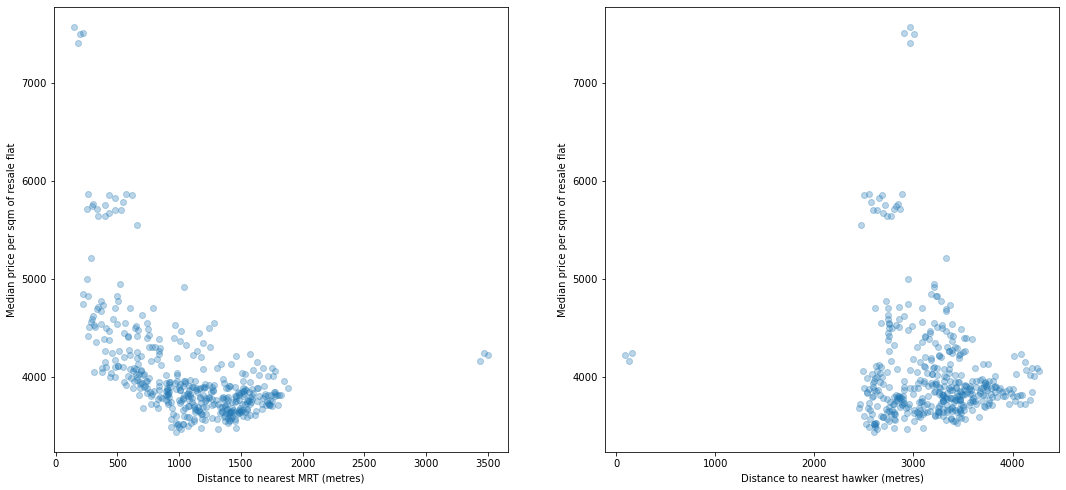

In [23]:
fig, axes = plt.subplots(1,2, figsize=(16,8))

axes[0].scatter(combined['min_dist_mrt'], combined['price_per_sqm'], alpha=0.3)
axes[0].set_xlabel('Distance to nearest MRT (metres)')
axes[0].set_ylabel('Median price per sqm of resale flat')

axes[1].scatter(combined['min_dist_hawker'], combined['price_per_sqm'], alpha = 0.3)
axes[1].set_xlabel('Distance to nearest hawker (metres)')
axes[1].set_ylabel('Median price per sqm of resale flat')

plt.tight_layout(pad=5.0)
plt.show()

### Central Area

In [27]:
central = df[df['town'] == 'CENTRAL AREA']

In [28]:
df_price = central[['address', 'price_per_sqm']].groupby('address').agg({'price_per_sqm': 'median'}).reset_index()
combined = pd.merge(resale, df_price, on = 'address')
combined

,latitude,longitude,blk_no,road_name,postal_code,address,min_dist_mrt,min_dist_hawker,price_per_sqm
0,1.281801,103.842908,4,SAGO LANE,050004,4 SAGO LANE,361.597750,56.645469,6008.955224
1,1.282116,103.842846,335A,SMITH STREET,051335,335A SMITH ST,346.018687,39.220117,6639.333333
2,1.275905,103.842741,4,TANJONG PAGAR PLAZA,081004,4 TG PAGAR PLAZA,339.921923,91.648057,7150.508475
3,1.276238,103.843006,1,TANJONG PAGAR PLAZA,082001,1 TG PAGAR PLAZA,304.765584,45.346706,7322.033898
4,1.307581,103.851478,668,CHANDER ROAD,210668,668 CHANDER RD,185.921207,182.801017,5028.057471
...,...,...,...,...,...,...,...,...,...
61,1.277799,103.841403,1B,CANTONMENT ROAD,085201,1B CANTONMENT RD,309.092462,235.977949,9594.280851
62,1.276622,103.841156,1E,CANTONMENT ROAD,085501,1E CANTONMENT RD,418.698772,223.796402,9587.368421
63,1.275532,103.841275,1G,CANTONMENT ROAD,085701,1G CANTONMENT RD,508.215608,242.240785,9270.002045
64,1.276920,103.841486,1D,CANTONMENT ROAD,085401,1D CANTONMENT RD,400.414882,190.134860,9584.042553


In [29]:
combined.corr()

,latitude,longitude,min_dist_mrt,min_dist_hawker,price_per_sqm
latitude,1.000000,0.901340,-0.392906,0.348415,-0.705758
longitude,0.901340,1.000000,-0.561498,0.338283,-0.513624
min_dist_mrt,-0.392906,-0.561498,1.000000,0.057302,0.086813
min_dist_hawker,0.348415,0.338283,0.057302,1.000000,0.088448
price_per_sqm,-0.705758,-0.513624,0.086813,0.088448,1.000000


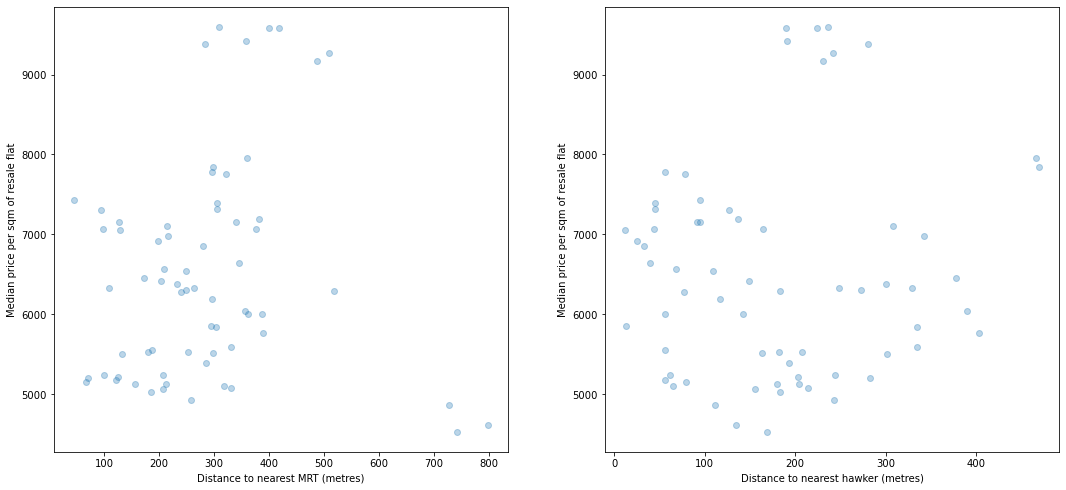

In [30]:
fig, axes = plt.subplots(1,2, figsize=(16,8))

axes[0].scatter(combined['min_dist_mrt'], combined['price_per_sqm'], alpha=0.3)
axes[0].set_xlabel('Distance to nearest MRT (metres)')
axes[0].set_ylabel('Median price per sqm of resale flat')

axes[1].scatter(combined['min_dist_hawker'], combined['price_per_sqm'], alpha = 0.3)
axes[1].set_xlabel('Distance to nearest hawker (metres)')
axes[1].set_ylabel('Median price per sqm of resale flat')

plt.tight_layout(pad=5.0)
plt.show()

### Jurong East

In [31]:
jurong_east = df[df['town'] == 'JURONG EAST']

In [32]:
df_price = jurong_east[['address', 'price_per_sqm']].groupby('address').agg({'price_per_sqm': 'median'}).reset_index()
combined = pd.merge(resale, df_price, on = 'address')
combined

,latitude,longitude,blk_no,road_name,postal_code,address,min_dist_mrt,min_dist_hawker,price_per_sqm
0,1.319022,103.746692,411,PANDAN GARDENS,600411,411 PANDAN GDNS,1637.588733,482.319246,3640.479651
1,1.319009,103.747433,410,PANDAN GARDENS,600410,410 PANDAN GDNS,1665.519242,558.962105,3619.265690
2,1.349533,103.731532,339,JURONG EAST AVENUE 1,600339,339 JURONG EAST AVE 1,802.685429,455.475520,4086.486486
3,1.336097,103.738219,102,JURONG EAST STREET 13,600102,102 JURONG EAST ST 13,557.519729,819.075500,4762.352941
4,1.338871,103.736219,110,JURONG EAST STREET 13,600110,110 JURONG EAST ST 13,557.401883,537.848115,4445.220588
...,...,...,...,...,...,...,...,...,...
220,1.348658,103.731789,372,JURONG EAST STREET 32,600372,372 JURONG EAST ST 32,702.984250,358.527701,5498.731501
221,1.348308,103.731920,371,JURONG EAST STREET 32,600371,371 JURONG EAST ST 32,662.826858,320.616539,5570.781250
222,1.322542,103.737561,57,TEBAN GARDENS ROAD,600057,57 TEBAN GDNS RD,1285.739462,607.524760,5521.611856
223,1.321892,103.737552,55,TEBAN GARDENS ROAD,600055,55 TEBAN GDNS RD,1352.069692,590.099088,5739.130435


In [33]:
combined.corr()

,latitude,longitude,min_dist_mrt,min_dist_hawker,price_per_sqm
latitude,1.000000,-0.535274,-0.792253,-0.022919,0.215545
longitude,-0.535274,1.000000,0.466710,0.556842,0.160113
min_dist_mrt,-0.792253,0.466710,1.000000,0.074802,-0.424087
min_dist_hawker,-0.022919,0.556842,0.074802,1.000000,0.493673
price_per_sqm,0.215545,0.160113,-0.424087,0.493673,1.000000


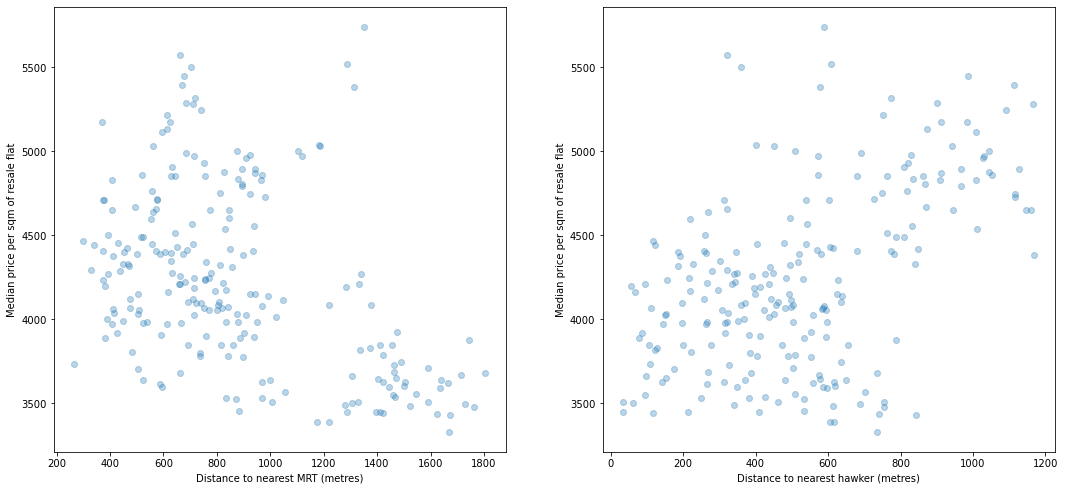

In [34]:
fig, axes = plt.subplots(1,2, figsize=(16,8))

axes[0].scatter(combined['min_dist_mrt'], combined['price_per_sqm'], alpha=0.3)
axes[0].set_xlabel('Distance to nearest MRT (metres)')
axes[0].set_ylabel('Median price per sqm of resale flat')

axes[1].scatter(combined['min_dist_hawker'], combined['price_per_sqm'], alpha = 0.3)
axes[1].set_xlabel('Distance to nearest hawker (metres)')
axes[1].set_ylabel('Median price per sqm of resale flat')

plt.tight_layout(pad=5.0)
plt.show()

In [35]:
bukit_timah = df[df['town'] == 'BUKIT TIMAH']

In [36]:
df_price = bukit_timah[['address', 'price_per_sqm']].groupby('address').agg({'price_per_sqm': 'median'}).reset_index()
combined = pd.merge(resale, df_price, on = 'address')
combined

,latitude,longitude,blk_no,road_name,postal_code,address,min_dist_mrt,min_dist_hawker,price_per_sqm
0,1.339311,103.772051,15,TOH YI DRIVE,590015,15 TOH YI DR,447.273855,440.519593,5990.856164
1,1.316412,103.805374,8,EMPRESS ROAD,260008,8 EMPRESS RD,250.424367,34.521045,5937.846154
2,1.317266,103.806783,1,QUEEN'S ROAD,260001,1 QUEEN'S RD,69.063998,170.333859,7113.821138
3,1.318832,103.808062,4,QUEEN'S ROAD,260004,4 QUEEN'S RD,171.762826,393.274903,5772.808219
4,1.339409,103.772606,16,TOH YI DRIVE,590016,16 TOH YI DR,386.577273,378.595498,6105.769231
5,1.318333,103.808097,3,QUEEN'S ROAD,260003,3 QUEEN'S RD,127.127411,358.169524,5850.769231
6,1.338403,103.772686,12,TOH YI DRIVE,NIL,12 TOH YI DR,438.612288,387.441476,6229.508197
7,1.339175,103.775341,2,TOH YI DRIVE,590002,2 TOH YI DR,196.183658,80.212887,6463.353151
8,1.338512,103.774570,4,TOH YI DRIVE,590004,4 TOH YI DR,294.892579,190.799344,6603.846154
9,1.338305,103.773542,9,TOH YI DRIVE,590009,9 TOH YI DR,377.713477,302.329070,6020.096154


In [37]:
combined.corr()

,latitude,longitude,min_dist_mrt,min_dist_hawker,price_per_sqm
latitude,1.000000,-0.994224,0.767402,0.229025,0.013887
longitude,-0.994224,1.000000,-0.816299,-0.238869,-0.048218
min_dist_mrt,0.767402,-0.816299,1.000000,0.517166,-0.005654
min_dist_hawker,0.229025,-0.238869,0.517166,1.000000,-0.260330
price_per_sqm,0.013887,-0.048218,-0.005654,-0.260330,1.000000


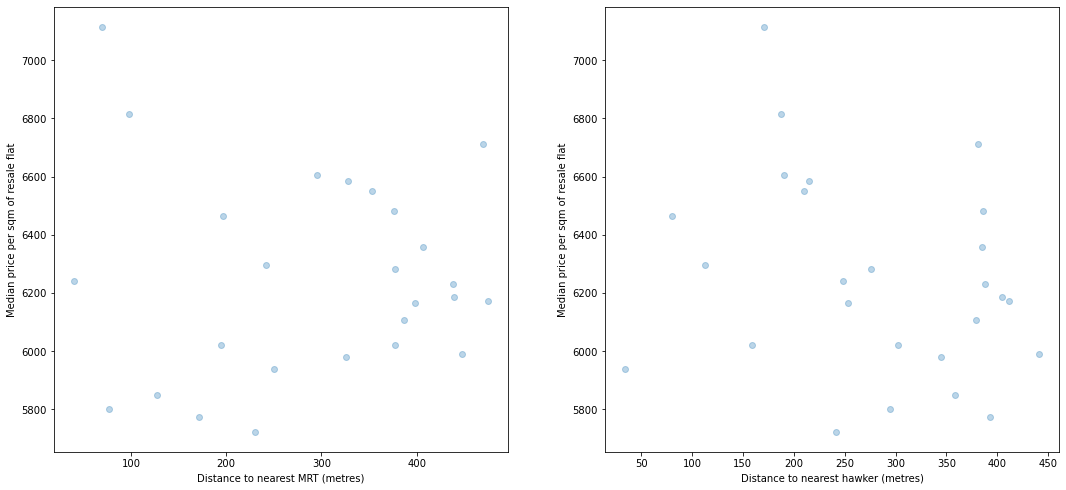

In [38]:
fig, axes = plt.subplots(1,2, figsize=(16,8))

axes[0].scatter(combined['min_dist_mrt'], combined['price_per_sqm'], alpha=0.3)
axes[0].set_xlabel('Distance to nearest MRT (metres)')
axes[0].set_ylabel('Median price per sqm of resale flat')

axes[1].scatter(combined['min_dist_hawker'], combined['price_per_sqm'], alpha = 0.3)
axes[1].set_xlabel('Distance to nearest hawker (metres)')
axes[1].set_ylabel('Median price per sqm of resale flat')

plt.tight_layout(pad=5.0)
plt.show()

# Summary

In this project, I explored how distances to nearest MRT and nearest hawker centre affect prices of resale flats in Singapore. 

It seems that the relationship between distances to these amenities and the prices of resale flats is not very strong. However, there are limitations with this current exploration and perhaps I can explore further to uncover more about the relationship.

Proximity to MRT is a good factor to look at for accessibility to public transport. However, it is not completely definitive of accessibility to public transport. Bus network also affects the accessibility to a particular location. While Singapore is small, this does not necessarily mean that all towns are homogeneous. Some towns may have more comprehensive bus network than the rest, making the distance to nearest MRT a less important factor in influencing the prices. 

Similarly, accessibility to hawker centres might be more important in some towns compared to the others, depending on what other food options are available in the town. Some newly developed estates tend to have a coffee shop and other food options within the estate itself. 

A quick look at a few different towns reveal that correlation coefficients between prices of resale flats and distance to nearest MRT stations and distance to nearest hawkers can differ. Distance to nearest MRT station seems to affect prices of resale flats more in towns like Jurong West, Pasir Ris and Jurong East, and not so much in centrally located areas. While shorter distace to nearest hawker leads to higher prices in towns like Jurong West and Bukit Timah, it seems that resale flats in Jurong East fetch higher prices if they are further away from hawkers.  


| Town        | Distance to nearest MRT | Distance to nearest hawker |
| ----------- | ----------------------- | -------------------------- |
| Jurong West | -0.388                  | -0.277                     |
| Pasir Ris   | -0.535                  | -0.171                     |
| Central     | 0.0868                  | 0.0884                     |
| Jurong East | -0.424                  | 0.494                      |
| Bukit Timah | -0.00565                | -0.260                     |





